# Lab Dimensionnality reduction

Welcome to the advanced Machine Learning Course.

The objective of this lab session is to code a few regression algorithms and to apply them to synthetic and real datasets.

Please put **"ML - MSc - TD7"** in the mail subject or I might lose your work (which means 0) and send it to pierre.houdouin@centralesupelec.fr

Please label your notebook **"L7_familyname1_familyname2.ipynb"** or I might lose your work (which means 0).

We begin with the standard imports:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

# Principal component analysis PCA

## Theoretical Problem
Consider a random variable X with p features, $X = (X^1,X^2,...X^p)^T$  

The goal of the PCA is to create $p$ new variables (principal components) which summarizes the best the variance of the previous $p$ variables such as if we take a subset of these new features the amount of variance provided is quite similar to the sum of variances of the whole original features.

We search new random variables, named principal components $Z^i$, as a linear combination of the original features $X^i$ i.e projecting X in a new basis.

\begin{align} Z^1 &= \alpha_{11}X^1 +\alpha_{12}X^2 + ... \alpha_{1p}X^p &= A_1^TX \\
 Z^2 &= \alpha_{21}X^1 +\alpha_{22}X^2 + ... \alpha_{2p}X^p &= A_2^TX  \\
 &\vdots \\
 Z^p &= \alpha_{p1}X^1 +\alpha_{p2}X^2 + ... \alpha_{pp}X^p &= A_p^TX
\end{align}

Eventually PCA looks for $A_1,...,A_p$ with the following conditions :
- $\forall i,  A^i= \underset{A}{\arg \max}\; Var(Z^i)$
- $Var(Z^1)\ge Var(Z^2)\ge...\ge Var(Z^p)$
- $\forall  i,j \; / \; i\neq j, cov(Z^i,Z^j) = 0 $
- $\forall i, Var(X^i) = 1$

The first principal components will contain most of the variance of X, we need to extract these first principal components for reducing the dimensionnality of our dataset.

Geometrically it means we seach for an orthogonal basis such as the inertia of the data points around the new axis is maximum.

## Theoretical Solution

If the random variable $X = (X^1,X^2,...X^p)^T $ is reduced & centered, i.e $ \forall i, E(X^i) =0 $ and $ Var(X^i) =1 $.

We call $\Sigma$ the covariance matrix of X
$$ \Sigma = P^TDP $$
with $D = diag(\lambda_1,\lambda_2,...,\lambda_p)$ such that $ \lambda_1 \ge\lambda_2 \ge ... \ge\lambda_p $

$\boxed{A_i =\text{ is the eigenvector of $\Sigma$ related to the eigenvalue $\lambda_i =$ the ith column of $P$ }}$

And $Var(Z^i) = \lambda_i$

## Practical Solution

Now imagine you have a dataset $M  \in \mathbb{R}^{n\times p}$ which could be interpreted as n realizations of the random variable X.

You need to create a centered matrix $\bar M=\begin{bmatrix} M_{1,1}-\bar M_1 & \cdots & M_{1,p}-\bar M_p \\ \vdots & \ddots & \vdots \\ M_{n,1}-\bar M_1 & \cdots & M_{n,p}-\bar M_p\end{bmatrix} $

With $\bar M_j = \frac{1}{n}\sum_{i=1}^n M_i^j$

We call $\bar \Sigma = \frac{1}{n-1}\bar M \bar M^T $the scatter matrix, which is an estimation of the covariance matrix.

#### Point on reduction
We can make the choice to reduce $\bar M$ to give a variance of one to each feature.

- If we do so : variables related to noise will have the same weight after PCA than a relevant variable.
- If we don't reduce our dataset : high variance features will totally dominate the PCA.

However if the features aren't with the same units, reduction is mandatory.





### Question : Considering  $ \bar \Sigma = P^T D P $, how do we project the vector $X$ on the k first principal components.




Answer : $\text{Projection}_k(\mathbf{X}) =  \mathbf{X} \mathbf{P}_k$. Where $X$ is a matrix with n rows and p columns (features) and $Pk$ is a matrix with p rows and k columns (features).





### Question : How do we compute the percentage of orignal variance retained by the k first principal components

Answer :

First, Compute the eigenvalues of the covariance matrix or the singular values of the

data matrix.

Sort the eigenvalues in descending order.

Select the first k eigenvalues.

Compute the sum of the selected k eigenvalues.

Compute the sum of all eigenvalues.

Calculate the percentage of variance retained using the formula:

$ \text{Percentage of Variance Retained} = \left( \frac{\text{Sum of the first } k \text{ eigenvalues}}{\text{Sum of all eigenvalues}} \right) \times 100 $



### Tasks :  Compute the PCA transformation

In [ ]:
class my_pca:

    def __init__(self,reduce=False):
        '''
        Attributes:

        sigma : np.array
            the scatter matrix
        eigenvectors : np.array
            the eigenvectors in a matrix : P
        reduce : boolean
            Reduce the scatter matrix or not i.e give a variance of 1 for each feature
        X : np.array
             The dataset we want to project in the new basis
        '''

        self.sigma = None
        self.eigenvectors = None
        self.reduce = reduce


    def fit(self,X):
        """ From X, compute the scatter matrix (sigma) and diagonalize sigma
        to extract the eigenvectors and the eigenvalues

        Parameters:
        -----------
        X: (n, p) np.array
            Data matrix

        Returns:
        -----
        Update self.eigenvalues, self.eigenvectors
        """

        #TODO
        n, p = X.shape
        # Compute the scatter matrix
        self.sigma = np.cov(X, rowvar=False)

        # Diagonalize sigma to get eigenvectors and eigenvalues
        eigenvalues, eigenvectors = np.linalg.eigh(self.sigma)

        # Sort eigenvectors based on eigenvalues in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.eigenvectors = eigenvectors[:, sorted_indices]

    def projection(self,X,no_dims):
        """ Project X on the no_dims first principal components

        Parameters:
        -----------
        no_dims: integer
            The number of dimension of our projected dataset
        X : np.array
            Dataset

        Returns:
        -----
        The projection of X on the no_dims principal components
            np.array of size (n,no_dims)
        """

        if self.eigenvectors is None:
            raise ValueError("Fit the model before calling projection method.")

        # Take the first 'no_dims' eigenvectors
        projection_matrix = self.eigenvectors[:, :no_dims]

        # Project the data onto the selected principal components
        projected_data = np.dot(X, projection_matrix)

        return projected_data



    def variance(self,no_dims):
        """ Returns the percentage of the total variance preserved by the projected dataset

        Parameters:
        -----------
        no_dims: integer
            The number of dimension of our projected dataset
         """

        #TODO
        if self.eigenvectors is None:
            raise ValueError("Fit the model before calling variance method.")

        # Compute the total variance
        total_variance = np.trace(self.sigma)

        # Compute the variance preserved by the first 'no_dims' principal components
        preserved_variance = np.trace(self.sigma[:, :no_dims])

        # Compute the percentage of preserved variance
        percentage_preserved_variance = (preserved_variance / total_variance) * 100

        return percentage_preserved_variance


## Application : Biostatistics

We are going to apply PCA to a medical dataset, in order to do data analysis and to finally  tell which medical features could allow doctors to diagnose breast cancer.



In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
H = load_breast_cancer()
X = load_breast_cancer().data
y = load_breast_cancer().target
feature_names = load_breast_cancer().feature_names

It seems that units of the features can be different, therefore we had better reduce our dataset in the PCA.
### Task : Apply PCA to the dataset

In [ ]:
pca = my_pca()
pca.fit(X)

## Choosing the number of principal components for our projection

As usual with unsupervised method there are many solutions to answer this question. Generally people either use elbow technique or keep a number of principal components such as it provides 80% or 90% or 95% of the total variance.

### Task : Print the percentage of variance retained versus the number of principal components

In [ ]:
import pandas as pd

table = pd.DataFrame()
princ_compo = []
preserved_variance = []
#We basically compute the total variance and then find what percent that the number of components we currently have reflects on the total.
for i in range(1, len(feature_names) + 1):
  pca.projection(X, no_dims = i)
  preserved_variance.append(pca.variance(no_dims = i))
  princ_compo.append(i)

table['Principal Components'] = princ_compo
table['Preserved Variance'] = preserved_variance

display(table)

,Principal Components,Preserved Variance
0,1,0.002748
1,2,0.006842
2,3,0.137500
3,4,27.542788
4,5,27.542789
5,6,27.542789
6,7,27.542791
7,8,27.542791
8,9,27.542791
9,10,27.542791


### Task : If we want to keep 90% of the variance how many principal components must we keep ?  

In [ ]:
def find_components_for_variance(X, target_variance):
  for i in range(1, len(X) + 1):
    pca.projection(X, no_dims = i)
    if pca.variance(no_dims = i) >= target_variance:
      return i
  return i

components = find_components_for_variance(X, 90)
print('The number of principal components we must keep to preserve 90% of the variance is', components)

The number of principal components we must keep to preserve 90% of the variance is 24


### Task : Plot the datapoints with their label along the 2 first principal components.
Use plt.scatter

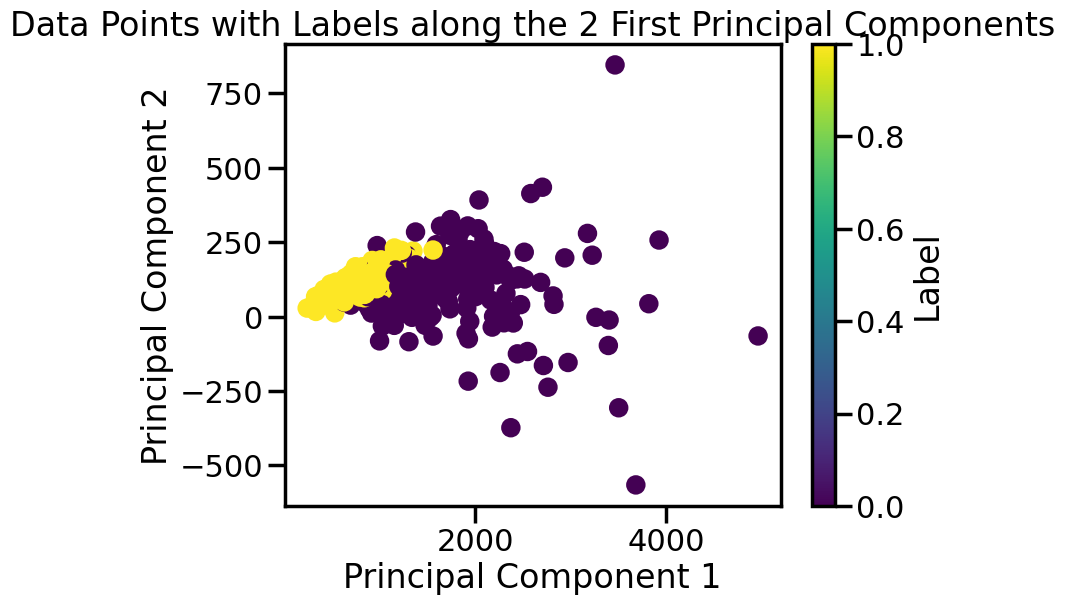

In [ ]:
projected_data = pca.projection(X, no_dims=2)

# Plot the data points with labels
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], c = y, cmap='viridis')
plt.title('Data Points with Labels along the 2 First Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label')
plt.show()

What we can see is that we can simply assign a label to datapoints regarding their position on the first principal components.
So the first axis is sufficient to do a quite good classification of malignant/benin cases.

For our diagnostic, we must know which feature affect the most this first principal components.



### Question : Which features influence the most 2 the first principal components

In [ ]:
most_influential_indices = np.argsort(np.abs(pca.eigenvectors[:, :1]), axis=0)[::-1][:2]
most_influential_features = [feature_names[i] for i in most_influential_indices]
# For the first principal component, we find the absolute value of the eigenvectors and select the first two with the highest value
print(most_influential_features)

[array(['worst area'], dtype='<U23'), array(['mean area'], dtype='<U23')]


### Limitations of PCA.

By its linear nature, PCA suffers from its inability to extract complicated structure.

Let's see with an exemple.

In [ ]:
X = np.loadtxt('mnist2500_X.txt')
labels = np.loadtxt('mnist2500_labels.txt')

### Tasks :
- Apply PCA to the dataset
- Project in 2D and plot the dataset with their label

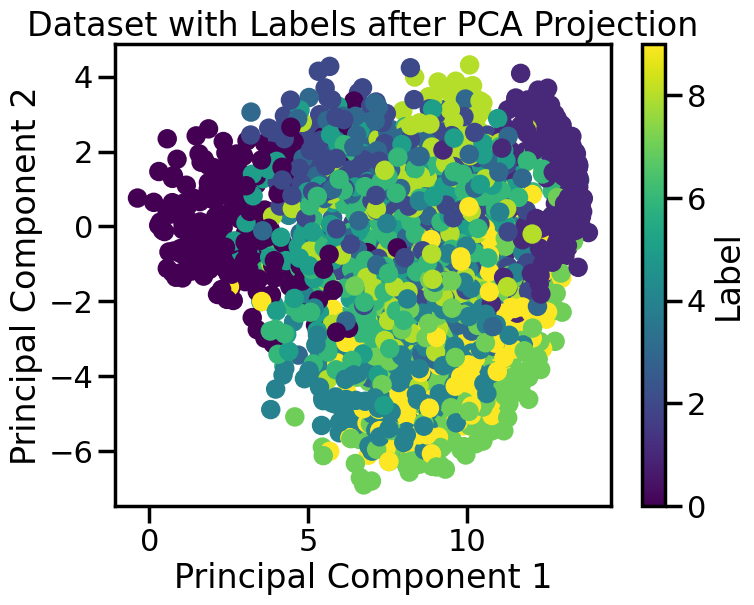

In [ ]:
pca = my_pca()
pca.fit(X)
projected_data = pca.projection(X, no_dims=2)

plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=labels, cmap='viridis')
plt.title('Dataset with Labels after PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label')
plt.show()

#It is very hard to distinguish most of the clusters here in 2d Using a PCA projection

It's quite impossible to distinguish most of the clusters. Right ?

### Non linear embedding : t-sne

In order to visualize dataset accurately, we are going to project our data using non linear methods in order to decompose faithfully the dataset in order to extract the intrisec structure of the data.

Sklearn definition of tsne : t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.




In [ ]:
from sklearn.manifold import TSNE

### Tasks :
- Apply tsne to the dataset
- Plot the dataset with their label

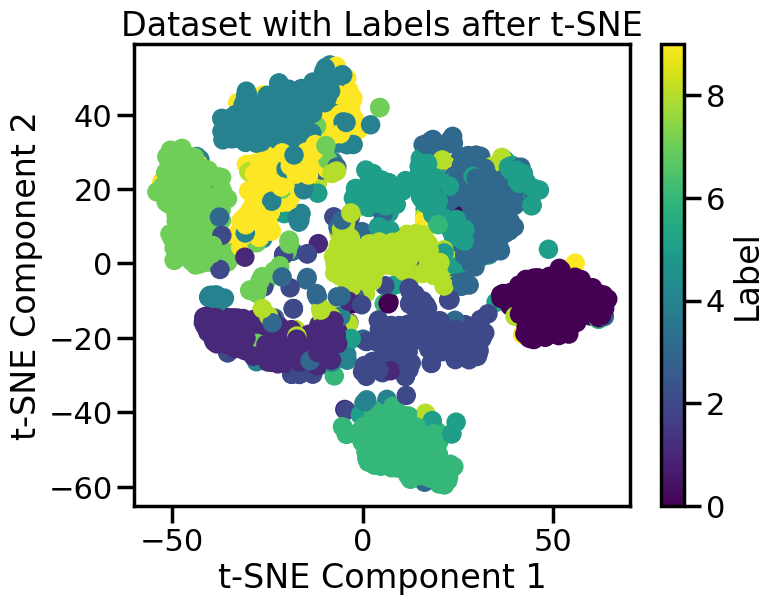

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=labels, cmap='viridis')
plt.title('Dataset with Labels after t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Label')
plt.show()

#Using t-SNE,  it becomes a lot easier in this case.
